In [4]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,9

# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go


init_notebook_mode(connected=True)

In [5]:
players_data = pd.read_csv('player_data.csv')
players = pd.read_csv('Players.csv')
seasons_stats = pd.read_csv('Seasons_Stats.csv')


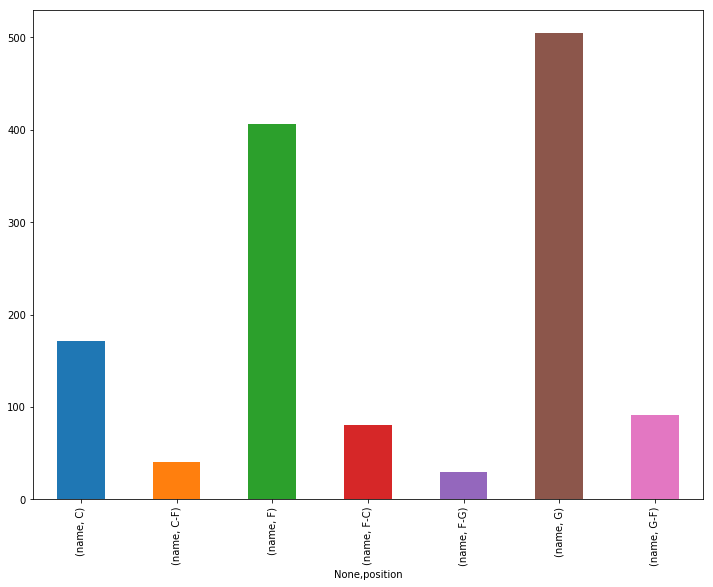

In [6]:
# Отобразим на графике популярные полизиции игроков, которые начали свою карьеру с 2000 года
# Самый наглядный способ увидеть каких игроков больше всего
players_data.where(players_data['year_start']>2000).groupby('position').count().\
filter(items=['position','name']).unstack().plot(kind='bar')


In [7]:
df = players_data.groupby(by=['position','year_start']).count()

In [8]:
positin_player = df.pivot_table(
                        index='position', 
                        columns='year_start', 
                        values='name', 
                        aggfunc=sum).fillna(0).applymap(float)

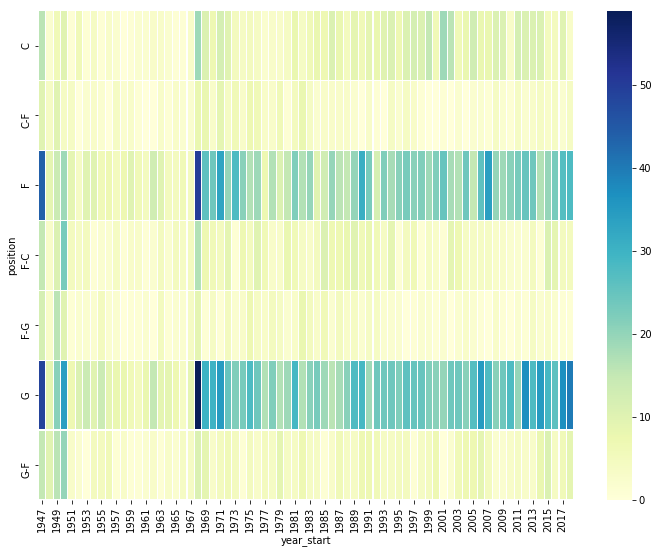

In [9]:
ax = sns.heatmap(positin_player, linewidths=0.05, cmap="YlGnBu")

# Увидим в каком году стартовало больше всего игроков определенной позиции
# Данный тип графика выбран для наглядности, например если необходимо в дальнейшем проанализировать конкурентность между
# играками одной позиции (для большей выборки)

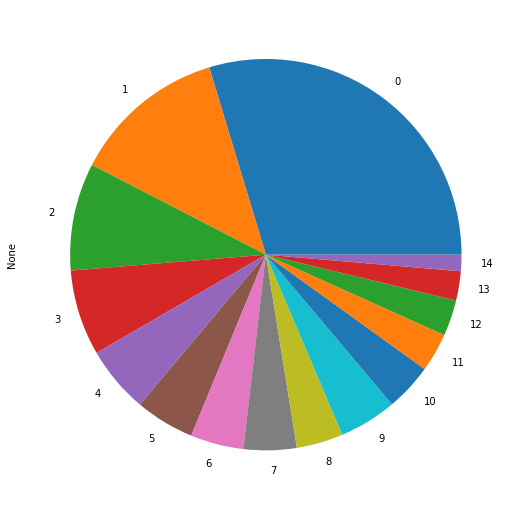

In [10]:
# Количество игроков в развике по количеству лет игры
play_year = players_data['year_end']-players_data['year_start']
play_year.where(play_year<15).groupby(play_year).count().plot(kind='pie')


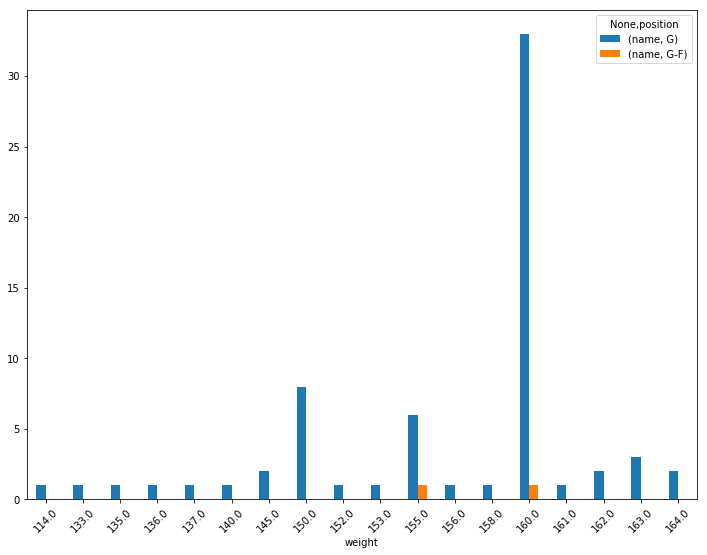

In [11]:
# позиция игроков по росту, среди игроков ниже 160 см
# Данные не совсем такие, какие бы хотелось видеть, но все же мы можем увидеть на каких позициях стоят игроки с низким ростом

players_data.where(players_data['weight']<165).filter(items=['position','weight','name'])\
.groupby(by=['weight','position']).count().unstack().plot(kind='bar', rot=45, stacked=False)

In [12]:
# Визуализация по штату игроков
players.groupby('birth_state').count().\
filter(items=['birth_state','Player']).sort_values('Player', ascending=False).style.bar()

,Player
birth_state,
California,344
New York,290
Illinois,209
Pennsylvania,163
Ohio,137
Michigan,131
Texas,129
Georgia,118
Louisiana,101


C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



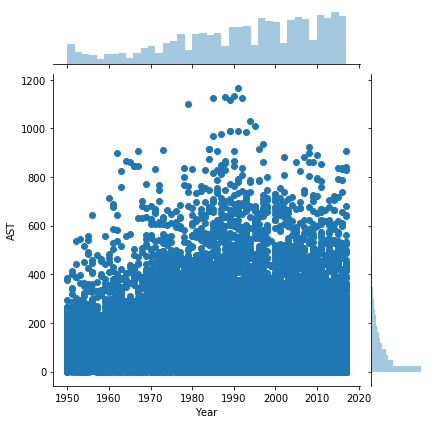

In [13]:
# Выводим количество очков помощи (Assist) d распределении по годам 
# Можно сделать еще более интересно сджоинив две таблицы, статистику по играм и информацию о игроке,
# чтобы увидеть в каком клубе у него больше AST
sns.jointplot(x='Year', y='AST', 
              data=seasons_stats.fillna(0).where(seasons_stats.fillna(0).Year>0), kind='scatter')

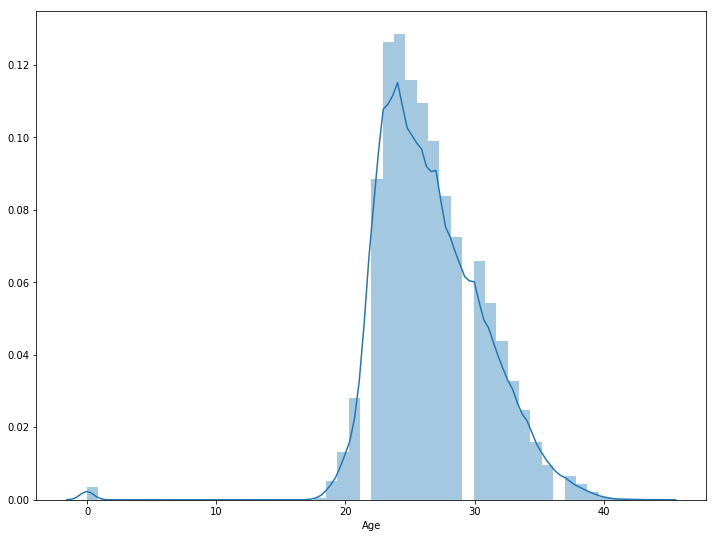

In [14]:
# Распределение возраста, на котором можно увидеть резкий старт (определенный возраст),
# а вот уход из карьеры спорта идет постепенный.
sns.distplot(seasons_stats.fillna(0).Age)